In this assignment we'll ask you to plot multiple variables.   

You will use what you find in this assignment to answer the questions in the quiz that follows. It may be useful to keep this notebook side-by-side with this week's quiz on your screen.

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 100)

path = "C:/Users/HOME/Documents/data_science/stat_data_viz_27082024/Module3/Cartwheeldata.csv"

In [30]:
data = {
    'Name': ['Yulia', 'Mihajlo', 'Sanja'],
    'Age': [33, 35, 39],
    'Profession': ['Data Scientist', 'Data Scientist', 'Finance']
}
data

data_f = pd.DataFrame(data)

print("Исходный DataFrame:")
print(data_f)

Исходный DataFrame:
      Name  Age      Profession
0    Yulia   33  Data Scientist
1  Mihajlo   35  Data Scientist
2    Sanja   39         Finance


In [23]:
# Создаем DataFrame
d = {
    'Имя': ['Аня', 'Борис', 'Вера', 'Гриша'],
    'Возраст': [22, 24, 20, 23],
    'Оценка': [85, 90, 78, 88]
}
d

{'Имя': ['Аня', 'Борис', 'Вера', 'Гриша'],
 'Возраст': [22, 24, 20, 23],
 'Оценка': [85, 90, 78, 88]}

In [24]:
d_f = pd.DataFrame(d)
d_f

,Имя,Возраст,Оценка
0,Аня,22,85
1,Борис,24,90
2,Вера,20,78
3,Гриша,23,88


In [ ]:
# Теперь используем метод query, чтобы выбрать студентов старше 21 года по профессии Data Scientist

In [33]:
# Используем метод query для фильтрации данных
filtered_df = data_f.query('Age > 21 and Profession == "Data Scientist"')

print("Filtered DataFrame:")
print(filtered_df)

# Метод query применяет это условие и возвращает только те строки DataFrame, которые удовлетворяют обоим условиям.

Filtered DataFrame:
      Name  Age      Profession
0    Yulia   33  Data Scientist
1  Mihajlo   35  Data Scientist


In [35]:
# First, you must import the cartwheel data from the path given above
df = pd.read_csv(path)

In [36]:
# Next, look at the 'head' of our DataFrame 'df'. 
# Вывод первых 5 строк данных
print(df.head())

   ID  Age Gender  GenderGroup Glasses  GlassesGroup  Height  Wingspan  \
0   1   56      F            1       Y             1    62.0      61.0   
1   2   26      F            1       Y             1    62.0      60.0   
2   3   33      F            1       Y             1    66.0      64.0   
3   4   39      F            1       N             0    64.0      63.0   
4   5   27      M            2       N             0    73.0      75.0   

   CWDistance Complete  CompleteGroup  Score  
0          79        Y              1      7  
1          70        Y              1      8  
2          85        Y              1      7  
3          87        Y              1     10  
4          72        N              0      4  


In [37]:
df.dtypes

ID                 int64
Age                int64
Gender            object
GenderGroup        int64
Glasses           object
GlassesGroup       int64
Height           float64
Wingspan         float64
CWDistance         int64
Complete          object
CompleteGroup      int64
Score              int64
dtype: object

In [38]:
df.describe()

,ID,Age,GenderGroup,GlassesGroup,Height,Wingspan,CWDistance,CompleteGroup,Score
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.00000,25.000000
mean,13.000000,28.240000,1.520000,0.560000,67.650000,66.260000,82.480000,0.76000,6.400000
std,7.359801,6.989754,0.509902,0.506623,4.431187,5.492647,15.058552,0.43589,2.533114
min,1.000000,22.000000,1.000000,0.000000,61.500000,57.500000,63.000000,0.00000,2.000000
25%,7.000000,24.000000,1.000000,0.000000,64.000000,62.000000,70.000000,1.00000,4.000000
50%,13.000000,26.000000,2.000000,1.000000,68.000000,66.000000,81.000000,1.00000,6.000000
75%,19.000000,29.000000,2.000000,1.000000,71.000000,71.000000,92.000000,1.00000,8.000000
max,25.000000,56.000000,2.000000,1.000000,75.000000,76.000000,115.000000,1.00000,10.000000


If you can't remember a function, open a previous notebook or video as a reference, or use your favorite search engine to look for a solution.

First, let's looks at two variables that we expect to have a strong relationship, 'Height' and 'Wingspan'.

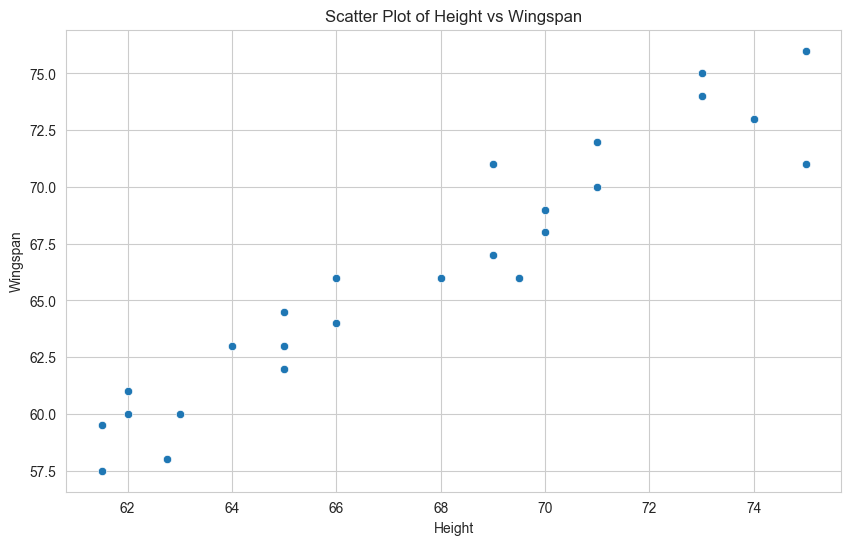

In [40]:
# Make a Seaborn scatter plot with x = height and y = wingspan using sns.scatterplot(x, y)
# Создаем диаграмму рассеяния
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.scatterplot(x='Height', y='Wingspan', data=df)

# Добавляем заголовок и метки осей
plt.title('Scatter Plot of Height vs Wingspan')
plt.xlabel('Height')
plt.ylabel('Wingspan')

# Показываем график
plt.show()

How would you describe the relationship between 'Height' and 'Wingspan'?   
Questions you can ask:
* Is it linear?
* Are there outliers?
* Are their ranges similar or different?  

How else could you describe the relationship?

#### 1) Is it linear?

* Linear Relationship: Check if there is a straight-line relationship between 'Height' and 'Wingspan'. A linear relationship means that as one variable changes, the other changes in a proportional manner. You can assess linearity by:

* Scatter Plot: Plot 'Height' on the x-axis and 'Wingspan' on the y-axis. A linear trend would show a straight line pattern.

* Correlation Coefficient: Calculate the Pearson correlation coefficient, which ranges from -1 to 1. A value close to 1 or -1 indicates a strong linear relationship, while a value close to 0 suggests no linear relationship.

In [61]:
correlation = df['Height'].corr(df['Wingspan'])
print(f"Pearson Correlation Coefficient: {correlation}")

Pearson Correlation Coefficient: 0.9540180704953923


#### 2) Are there outliers?
Scatter Plot: Outliers will appear as isolated points that are distant from the main cluster.
Statistical Tests: Use statistical methods like Z-scores or IQR (Interquartile Range) to detect outliers.

In [62]:
from scipy import stats

z_scores = np.abs(stats.zscore(df[['Height', 'Wingspan']]))
outliers = (z_scores > 3).all(axis=1)
print(f"Number of Outliers: {np.sum(outliers)}")

Number of Outliers: 0


#### 3) Are their ranges similar or different?

* Range Comparison: Compare the ranges (or spread) of 'Height' and 'Wingspan'. The range can be understood as the difference
between the maximum and minimum values of each variable.
* Descriptive Statistics: Calculate the range, mean, and standard deviation for both variables.
python

In [63]:
height_range = df['Height'].max() - df['Height'].min()
wingspan_range = df['Wingspan'].max() - df['Wingspan'].min()
print(f"Height Range: {height_range}")
print(f"Wingspan Range: {wingspan_range}")

Height Range: 13.5
Wingspan Range: 18.5


#### 4) How else could you describe the relationship?
* Scatter Plot Analysis: Beyond linearity, check if there is any pattern, such as clusters or curves, that indicates a more complex relationship.
* Regression Analysis: Fit a regression model to quantify the relationship and understand the slope and intercept.
* Joint Distribution: Examine the joint distribution of 'Height' and 'Wingspan' to see how they vary together.
python.

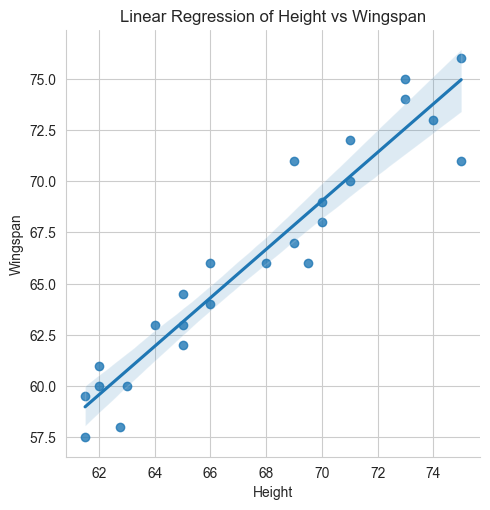

In [64]:
sns.lmplot(x='Height', y='Wingspan', data=df)
plt.title('Linear Regression of Height vs Wingspan')
plt.show()

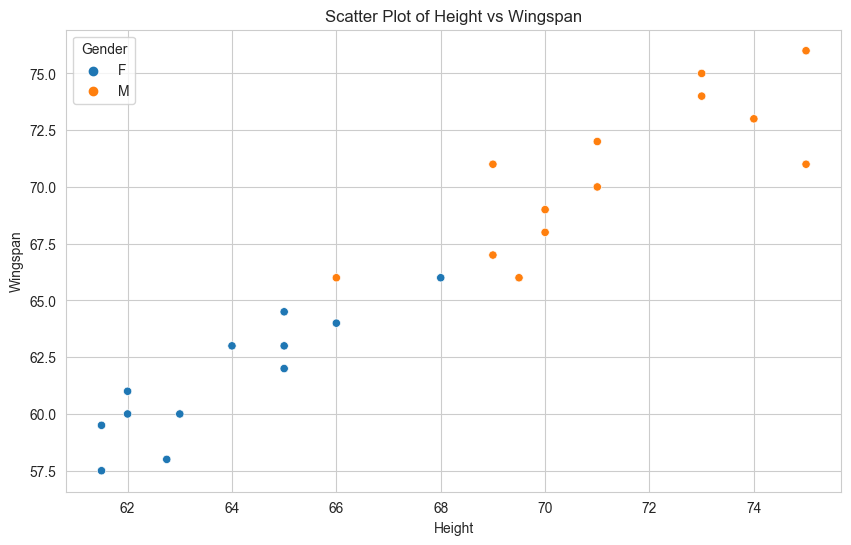

In [65]:
# Adding 'Gender' as a confounding variable
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.scatterplot(x='Height', y='Wingspan', hue='Gender', data=df)

# Добавляем заголовок и метки осей
plt.title('Scatter Plot of Height vs Wingspan')
plt.xlabel('Height')
plt.ylabel('Wingspan')

# Показываем график
plt.show()

Now let's look at two variables that we don't yet assume have a strong relationship, 'Wingspan' and 'CWDistance'

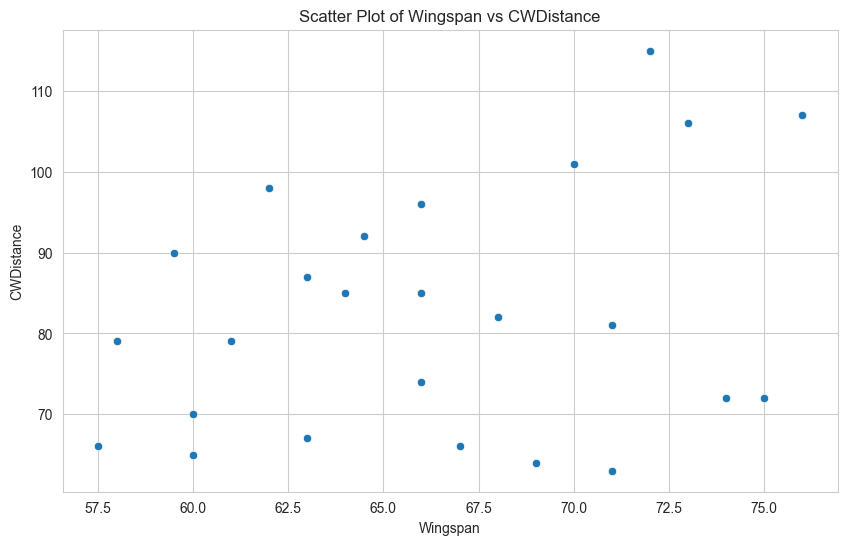

In [52]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance
# Создаем диаграмму рассеяния
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
sns.scatterplot(x='Wingspan', y='CWDistance', data=df)

# Добавляем заголовок и метки осей
plt.title('Scatter Plot of Wingspan vs CWDistance')
plt.xlabel('Wingspan')
plt.ylabel('CWDistance')

# Показываем график
plt.show()

How would you describe the relationship between 'Wingspan' and 'CWDistance'?   
* Is it linear?
* Are there outliers?
* Are their ranges similar or different?  

How else could you describe the relationship?

In [ ]:
# Is it linear?
cor_Wingspan_CWDistance = df['Wingspan'].corr(df['CWDistance'])
print(f"Pearson Correlation Coefficient: {cor_Wingspan_CWDistance}")

In [48]:
# Are there outliers?
from scipy import stats

z_scores = np.abs(stats.zscore(df[['Wingspan', 'CWDistance']]))
outliers = (z_scores > 3).all(axis=1)
print(f"Number of Outliers: {np.sum(outliers)}")

Number of Outliers: 0


In [49]:
# 3) Are their ranges similar or different?
Wingspan_range = df['Wingspan'].max() - df['Wingspan'].min()
CWDistance_range = df['CWDistance'].max() - df['CWDistance'].min()
print(f"Wingspan Range: {Wingspan_range}")
print(f"CWDistance Range: {CWDistance_range}")

Wingspan Range: 18.5
CWDistance Range: 52


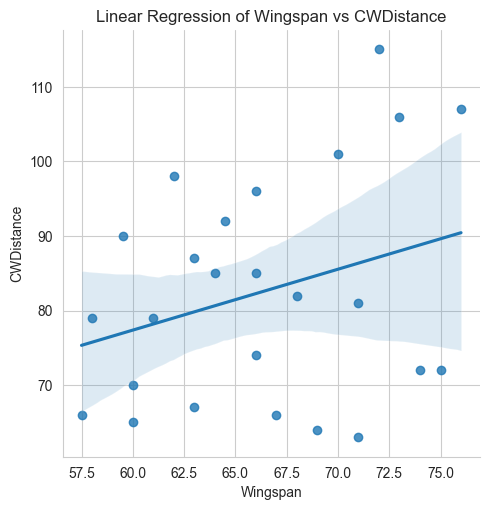

In [50]:
# 4) How else could you describe the relationship?
sns.lmplot(x='Wingspan', y='CWDistance', data=df)
plt.title('Linear Regression of Wingspan vs CWDistance')
plt.show()

Let makes the same plot as above, but now include 'Gender' as the color scheme by including the argument
```
hue=df['Gender']
```
in the Seaborn function

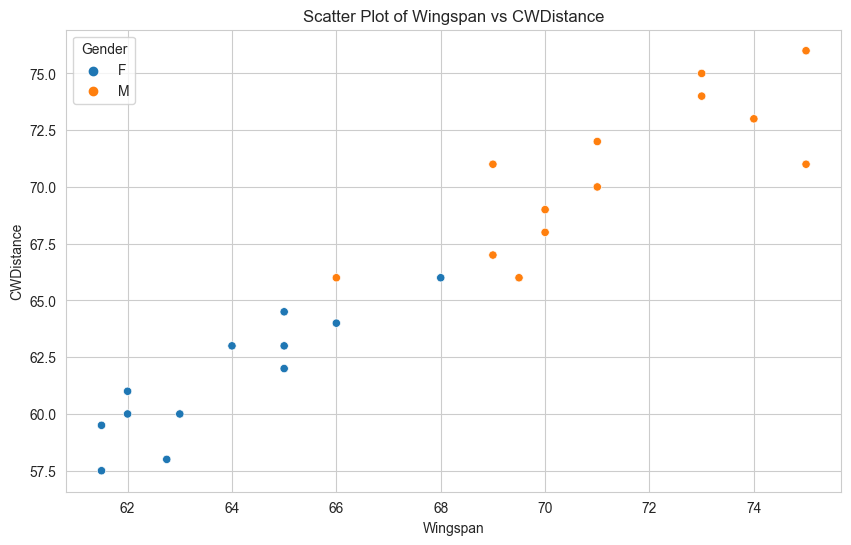

In [54]:
# Make a Seaborn scatter plot with x = wingspan and y = cartwheel distance, and hue = gender
# В Seaborn параметр hue используется для добавления дополнительного уровня информации в визуализацию. В случае с графиками рассеяния (scatter plots), hue позволяет цветом различать точки по какой-либо категории или классу.

# Когда вы указываете hue='Gender' в функции sns.scatterplot(), Seaborn использует значения в столбце 'Gender' для окрашивания точек на графике. Это позволяет визуально отделить точки по разным категориям, представленным в этом столбце, что делает сравнение между группами более наглядным.

# Создаем диаграмму рассеяния
plt.figure(figsize=(10, 6))  # Устанавливаем размер графика
# sns.scatterplot(x='Wingspan', y='CWDistance', data=df)
sns.scatterplot(x='Height', y='Wingspan', hue='Gender', data=df)
# Добавляем заголовок и метки осей
plt.title('Scatter Plot of Wingspan vs CWDistance')
plt.xlabel('Wingspan')
plt.ylabel('CWDistance')

# Показываем график
plt.show()

Does does this new information on the plot change your interpretation of the relationship between 'Wingspan' and 'CWDistance'?

## Barcharts
Now lets plot barplots of 'Glasses'

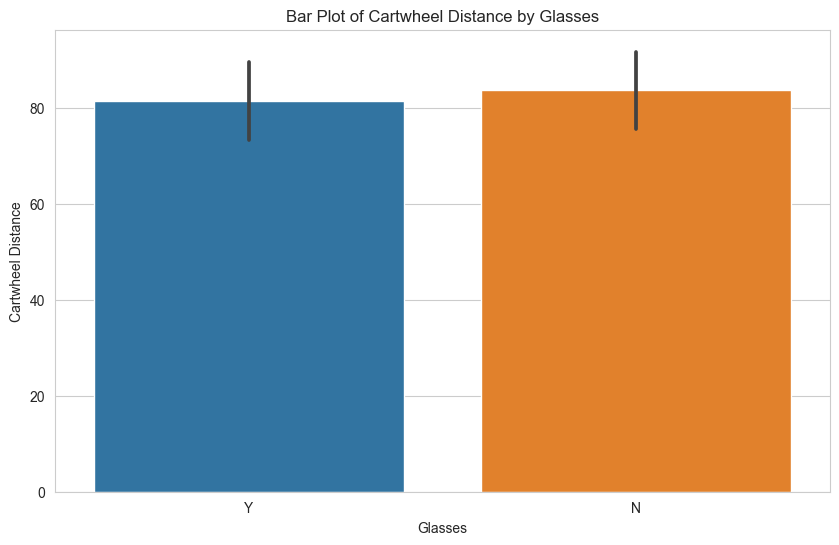

In [58]:
# Make a Seaborn barplot with x = glasses and y = cartwheel distance
# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Glasses', y='CWDistance',data=df)

# Add title and labels
plt.title('Bar Plot of Cartwheel Distance by Glasses')
plt.xlabel('Glasses')
plt.ylabel('Cartwheel Distance')

# Show plot
plt.show()

What can you say about the relationship of 'Glasses' and 'CWDistance'?

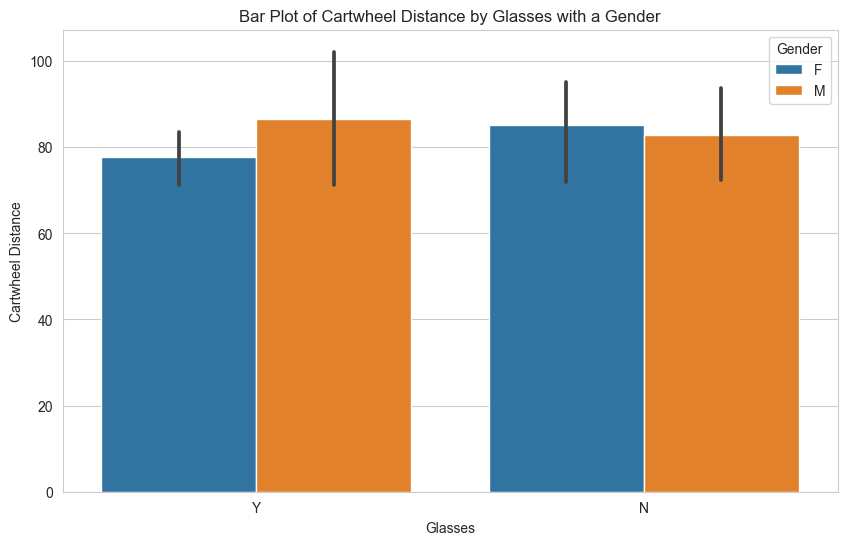

In [60]:
# Make the same Seaborn boxplot as above, but include gender for the hue argument
# Create a barplot
plt.figure(figsize=(10, 6))
sns.barplot(x='Glasses', y='CWDistance', hue='Gender', data=df) #with a confounding variable 'Gender'

# Add title and labels
plt.title('Bar Plot of Cartwheel Distance by Glasses with a Gender')
plt.xlabel('Glasses')
plt.ylabel('Cartwheel Distance')

# Show plot
plt.show()

How does this new plot change your interpretation about the relationship of 'Glasses' and 'CWDistance'?